In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt




In [ ]:
data = pd.read_csv('KDD.csv')

In [ ]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data.count

<bound method DataFrame.count of         duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494016         0        310       1881     0               0       0    0   
494017         0        282       2286     0               0       0    0   
494018         0        203       1200     0               0       0    0   
494019         0        291       1200     0               0       0    0   
494020         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  num_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   src_bytes                    494021 non-null  int64  
 2   dst_bytes                    494021 non-null  int64  
 3   land                         494021 non-null  int64  
 4   wrong_fragment               494021 non-null  int64  
 5   urgent                       494021 non-null  int64  
 6   hot                          494021 non-null  int64  
 7   num_failed_logins            494021 non-null  int64  
 8   logged_in                    494021 non-null  int64  
 9   num_compromised              494021 non-null  int64  
 10  root_shell                   494021 non-null  int64  
 11  su_attempted                 494021 non-null  int64  
 12  num_root                     494021 non-null  int64  
 13 

In [ ]:
#  X and Y
X = data.iloc[:, :-1] # all columns except the last one
Y = data.iloc[:, -1] # last column

In [ ]:
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0,282,2286,0,0,0,0,0,1,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0,203,1200,0,0,0,0,0,1,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,291,1200,0,0,0,0,0,1,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
494016    0
494017    0
494018    0
494019    0
494020    0
Name: target, Length: 494021, dtype: int64

In [ ]:
# Normalize X using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# Compute filter-based feature selection algorithm to select 10 features
selector = SelectKBest(score_func=f_classif, k=9)
X = selector.fit_transform(X , Y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
# Create a new dataframe with the selected features and target variable
feature_names = data.columns[:-1][selector.get_support()]
my_data = pd.DataFrame(X, columns=feature_names)
my_data["target"] = Y

# Show the first five rows of the resulting dataset
print(my_data.head())

   logged_in     count  srv_count  serror_rate  same_srv_rate  \
0        1.0  0.015656   0.015656          0.0            1.0   
1        1.0  0.015656   0.015656          0.0            1.0   
2        1.0  0.015656   0.015656          0.0            1.0   
3        1.0  0.011742   0.011742          0.0            1.0   
4        1.0  0.011742   0.011742          0.0            1.0   

   srv_diff_host_rate  dst_host_count  dst_host_same_src_port_rate  \
0                 0.0        0.035294                         0.11   
1                 0.0        0.074510                         0.05   
2                 0.0        0.113725                         0.03   
3                 0.0        0.152941                         0.03   
4                 0.0        0.192157                         0.02   

   dst_host_srv_serror_rate  target  
0                       0.0       0  
1                       0.0       0  
2                       0.0       0  
3                       0.0       0 

In [ ]:

# Subset 1: 70% train, 30% test
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.3, random_state=42)
# Report for Subset 1
print("Subset 1:")
print("Number of training examples:", len(X_train_1))
print("Number of test examples:", len(X_test_1))
print("Training labels distribution:", np.unique(Y_train_1, return_counts=True))
print("Test labels distribution:", np.unique(Y_test_1, return_counts=True))
print()

Subset 1:
Number of training examples: 345814
Number of test examples: 148207
Training labels distribution: (array([0, 1]), array([ 68086, 277728]))
Test labels distribution: (array([0, 1]), array([ 29192, 119015]))



In [ ]:
# Subset 2: 60% train, 40% test
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.4, random_state=42)
# Report for Subset 2
print("Subset 2:")
print("Number of training examples:", len(X_train_2))
print("Number of test examples:", len(X_test_2))
print("Training labels distribution:", np.unique(Y_train_2, return_counts=True))
print("Test labels distribution:", np.unique(Y_test_2, return_counts=True))
print()

Subset 2:
Number of training examples: 296412
Number of test examples: 197609
Training labels distribution: (array([0, 1]), array([ 58301, 238111]))
Test labels distribution: (array([0, 1]), array([ 38977, 158632]))



In [ ]:
# Subset 3: 50% train, 50% test
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, Y, test_size=0.5, random_state=42)
# Report for Subset 3
print("Subset 3:")
print("Number of training examples:", len(X_train_3))
print("Number of test examples:", len(X_test_3))
print("Training labels distribution:", np.unique(Y_train_3, return_counts=True))
print("Test labels distribution:", np.unique(Y_test_3, return_counts=True))
print()

Subset 3:
Number of training examples: 247010
Number of test examples: 247011
Training labels distribution: (array([0, 1]), array([ 48628, 198382]))
Test labels distribution: (array([0, 1]), array([ 48650, 198361]))



In [ ]:
# 1 Train a decision tree classifier
clf_1 = DecisionTreeClassifier(random_state=42)
clf_1.fit(X_train_1, Y_train_1)

# Evaluate the performance on test data
y_pred_1 = clf_1.predict(X_test_1)
accuracy_1 = accuracy_score(Y_test_1, y_pred_1)
report_1 = classification_report(Y_test_1, y_pred_1)

# Report the classification performance
print("Subset 1:")
print("Accuracy:", accuracy_1)

print(report_1)
print()


Subset 1:
Accuracy: 0.9905065212844197
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207




In [ ]:
# 2 Train a decision tree classifier
clf_2 = DecisionTreeClassifier(random_state=42)
clf_2.fit(X_train_2, Y_train_2)

# Evaluate the performance on test data
y_pred_2 = clf_2.predict(X_test_2)
accuracy_2 = accuracy_score(Y_test_2, y_pred_2)
report_2 = classification_report(Y_test_2, y_pred_2)

# Report the classification performance
print("Subset 2:")
print("Accuracy:", accuracy_2)
print(report_2)
print()

Subset 2:
Accuracy: 0.9908050746676518
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609




In [ ]:
# 3 Train a decision tree classifier
clf_3 = DecisionTreeClassifier(random_state=42)
clf_3.fit(X_train_3, Y_train_3)

# Evaluate the performance on test data
y_pred_3 = clf_3.predict(X_test_3)
accuracy_3 = accuracy_score(Y_test_3, y_pred_3)
report_3 = classification_report(Y_test_3, y_pred_3)

# Report the classification performance
print("Subset 3:")
print("Accuracy:", accuracy_3)
print(report_3)
print()

Subset 3:
Accuracy: 0.9909072875297051
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011




Subset 1:
Number of training examples: 345814
Number of test examples: 148207
Training labels distribution: (array([0, 1]), array([ 68086, 277728]))
Test labels distribution: (array([0, 1]), array([ 29192, 119015]))
Max depth 4: accuracy = 0.9857226716686797


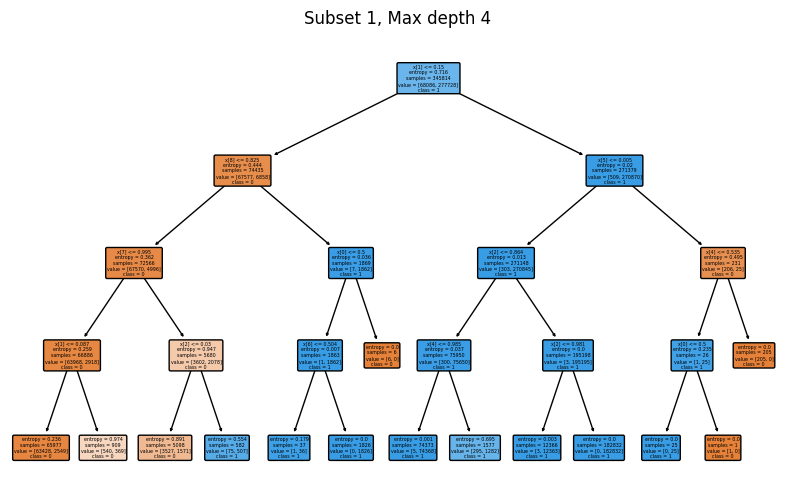

Max depth 6: accuracy = 0.988522809314


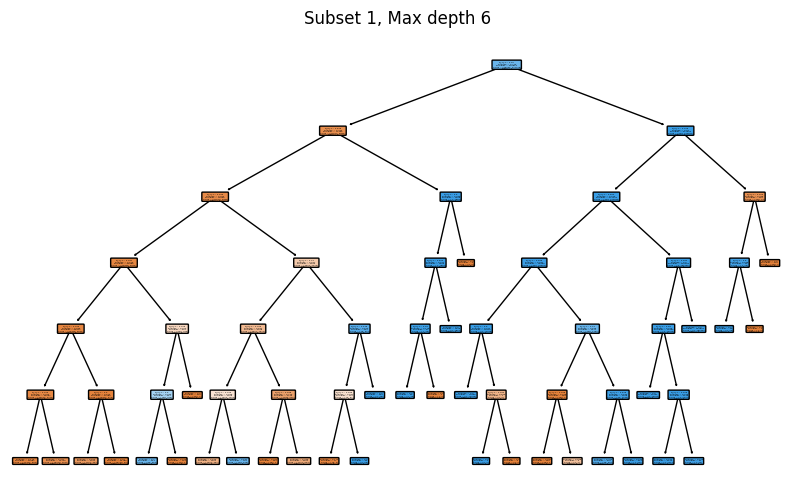

Max depth 8: accuracy = 0.9901219240656649


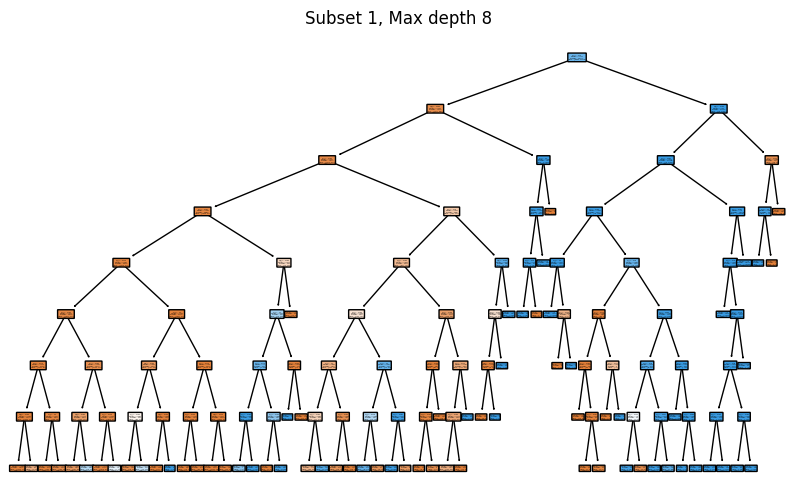

Best split for Subset 1 (Entropy): max depth = 8, accuracy = 0.9901219240656649

Subset 2:
Number of training examples: 296412
Number of test examples: 197609
Training labels distribution: (array([0, 1]), array([ 58301, 238111]))
Test labels distribution: (array([0, 1]), array([ 38977, 158632]))
Max depth 4: accuracy = 0.9858710888674099


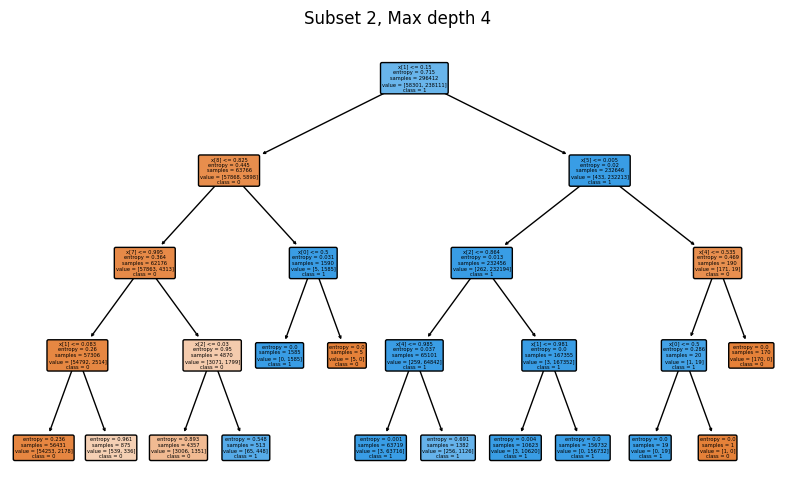

Max depth 6: accuracy = 0.9887758148667318


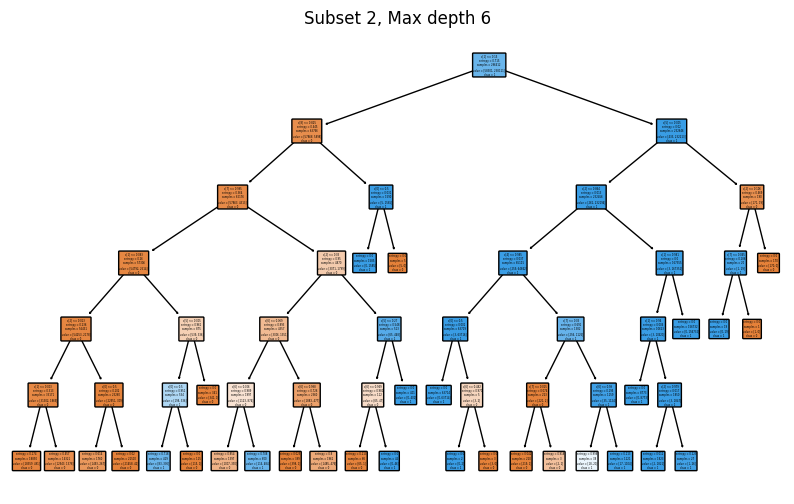

Max depth 8: accuracy = 0.9902484198594194


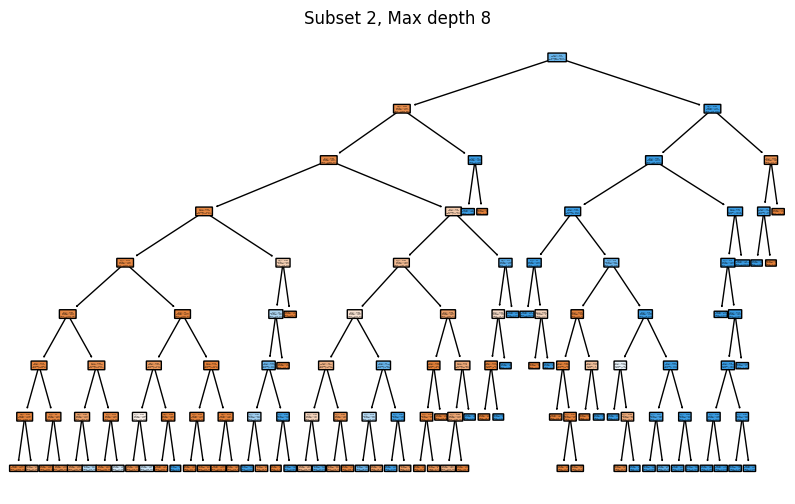

Best split for Subset 2 (Entropy): max depth = 8, accuracy = 0.9902484198594194

Subset 3:
Number of training examples: 247010
Number of test examples: 247011
Training labels distribution: (array([0, 1]), array([ 48628, 198382]))
Test labels distribution: (array([0, 1]), array([ 48650, 198361]))
Max depth 4: accuracy = 0.986073494702665


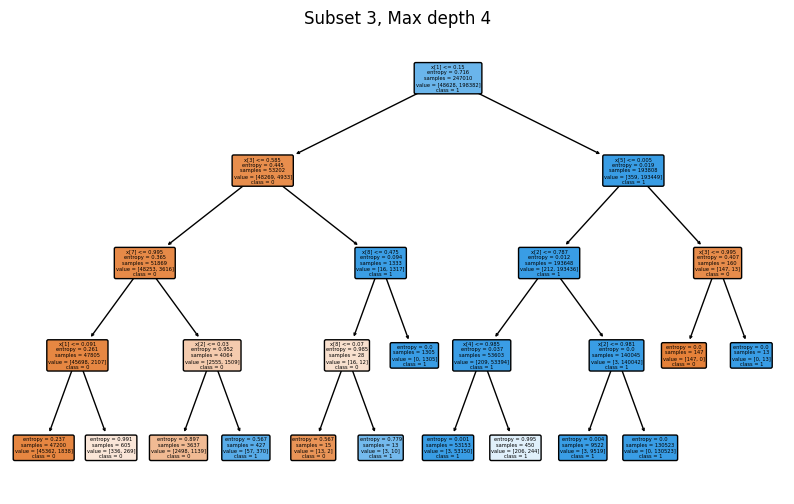

Max depth 6: accuracy = 0.9889073765945646


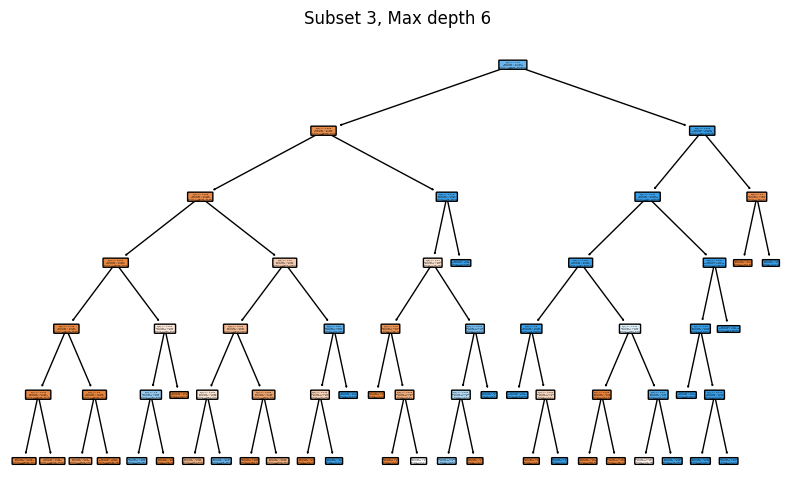

Max depth 8: accuracy = 0.9904093339972714


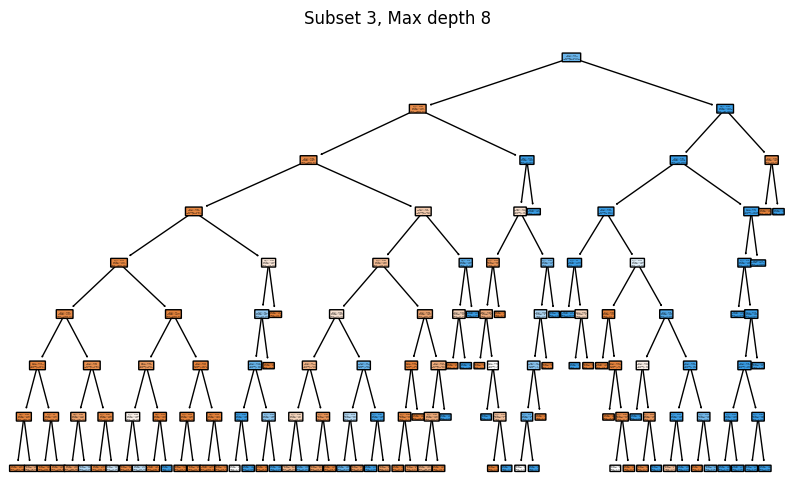

Best split for Subset 3 (Entropy): max depth = 8, accuracy = 0.9904093339972714

Best split from all subsets (Entropy): Subset 1, max depth = 8 


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a list of max depths to try
max_depths = [4, 6, 8]

# Loop over subsets and max depths
for i, (X_train, X_test, Y_train, Y_test) in enumerate([(X_train_1, X_test_1, Y_train_1, Y_test_1),
                                                         (X_train_2, X_test_2, Y_train_2, Y_test_2),
                                                         (X_train_3, X_test_3, Y_train_3, Y_test_3)]):
    print(f"Subset {i+1}:")
    print("Number of training examples:", len(X_train))
    print("Number of test examples:", len(X_test))
    print("Training labels distribution:", np.unique(Y_train, return_counts=True))
    print("Test labels distribution:", np.unique(Y_test, return_counts=True))

    # Loop over max depths
    best_accuracy = 0
    best_depth = 0
    for depth in max_depths:
        # Train a decision tree classifier with the current max depth
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
        clf.fit(X_train, Y_train)

        # Evaluate the performance on test data
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)

        # Report the classification performance
        print(f"Max depth {depth}: accuracy = {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth

        # Visualize the decision tree
        plt.figure(figsize=(10, 6))
        plot_tree(clf, filled=True, rounded=True, class_names=['0', '1'])
        plt.title(f"Subset {i+1}, Max depth {depth}")
        plt.show()

    # Report the best split for the current subset
    print(f"Best split for Subset {i+1} (Entropy): max depth = {best_depth}, accuracy = {best_accuracy}")
    print()
  # Store the best split information for all subsets
best_accuracy_all = 0
best_depth_all = 0
best_subset_all = 0

# Loop over subsets and max depths
for i, (X_train, X_test, Y_train, Y_test) in enumerate([(X_train_1, X_test_1, Y_train_1, Y_test_1),
                                                       (X_train_2, X_test_2, Y_train_2, Y_test_2),
                                                       (X_train_3, X_test_3, Y_train_3, Y_test_3)]):





    # Update the best split from all subsets if necessary
    if best_accuracy > best_accuracy_all:
        best_accuracy_all = best_accuracy
        best_depth_all = best_depth
        best_subset_all = i+1

# Print the best split from all the subsets
print(f"Best split from all subsets (Entropy): Subset {best_subset_all}, max depth = {best_depth_all} ")




Test size 0.3, max depth 4: accuracy = 0.9857226716686797
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     29192
           1       1.00      0.98      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion matrix:
[[ 29046    146]
 [  1970 117045]]


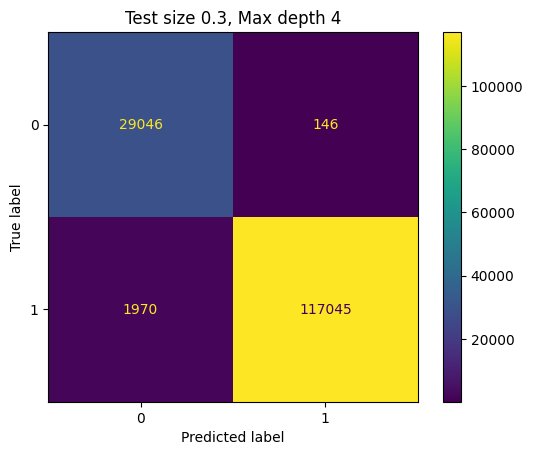

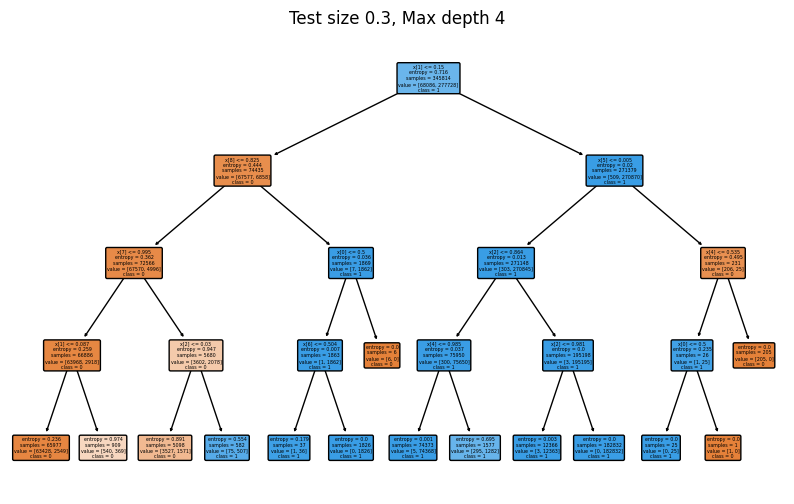

Test size 0.3, max depth 6: accuracy = 0.988522809314
Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion matrix:
[[ 29055    137]
 [  1564 117451]]


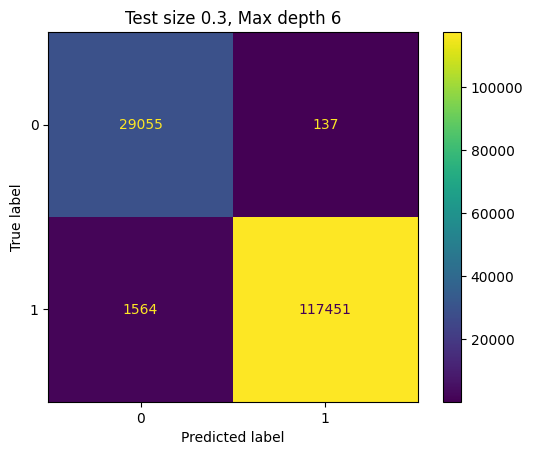

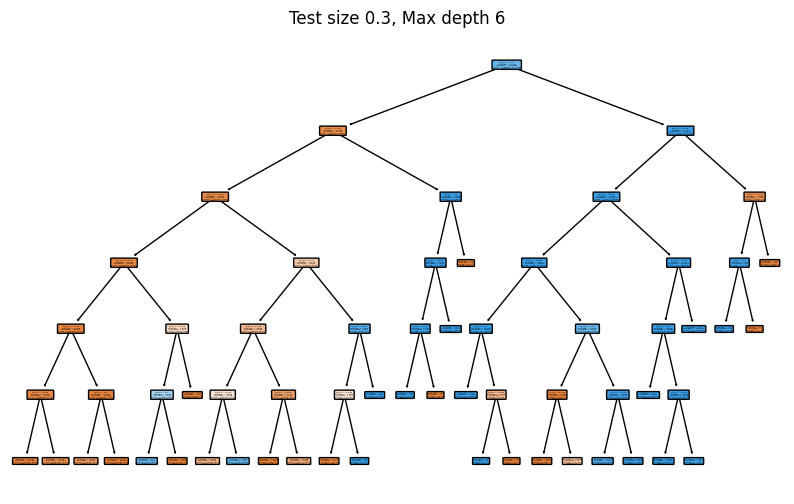

Test size 0.3, max depth 8: accuracy = 0.9901219240656649
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion matrix:
[[ 28990    202]
 [  1262 117753]]


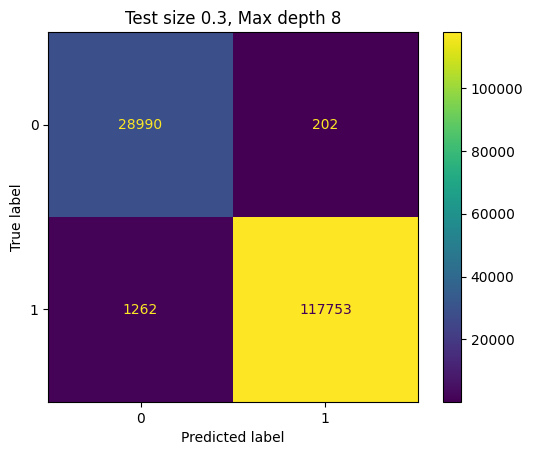

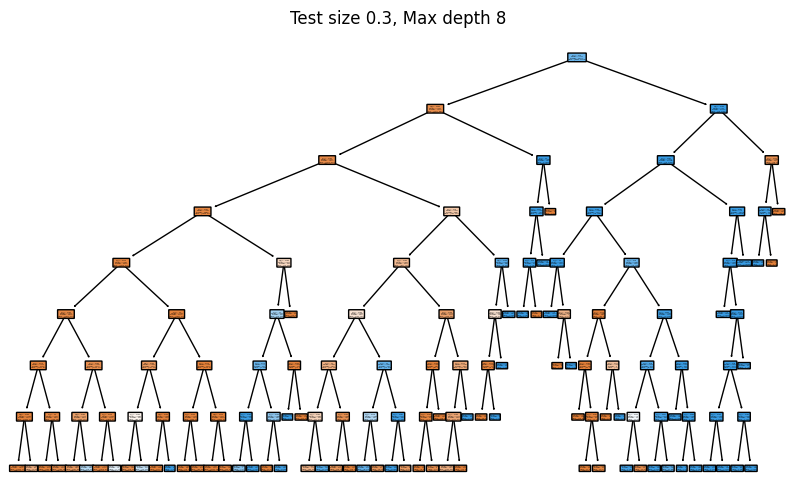

Best split for Test size 0.3 (Entropy): max depth = 8, accuracy = 0.9901219240656649

Test size 0.4, max depth 4: accuracy = 0.9858710888674099
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     38977
           1       1.00      0.98      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion matrix:
[[ 38779    198]
 [  2594 156038]]


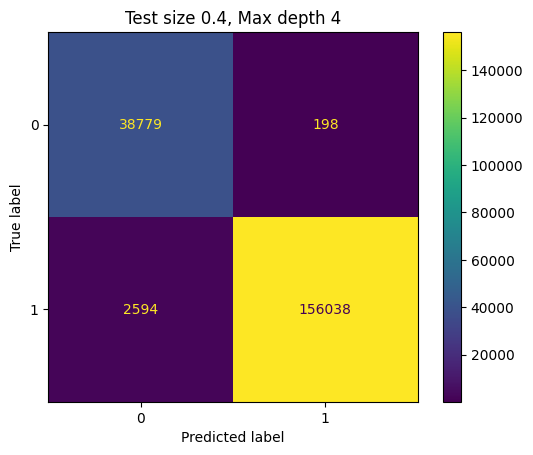

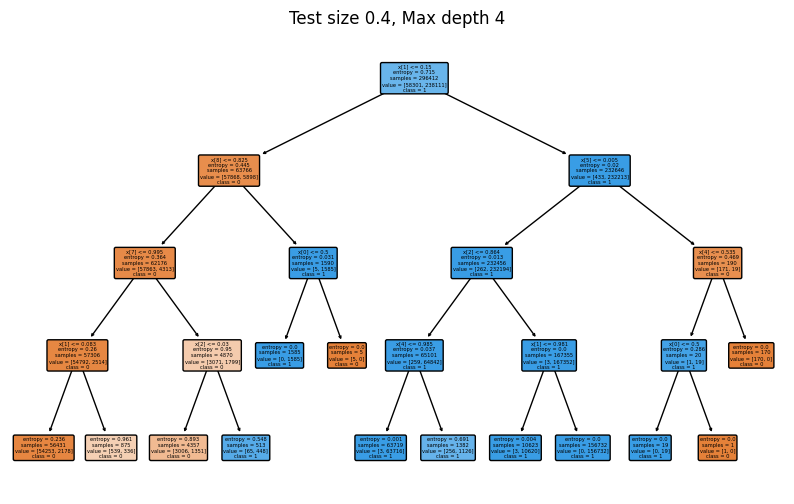

Test size 0.4, max depth 6: accuracy = 0.9887758148667318
Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion matrix:
[[ 38802    175]
 [  2043 156589]]


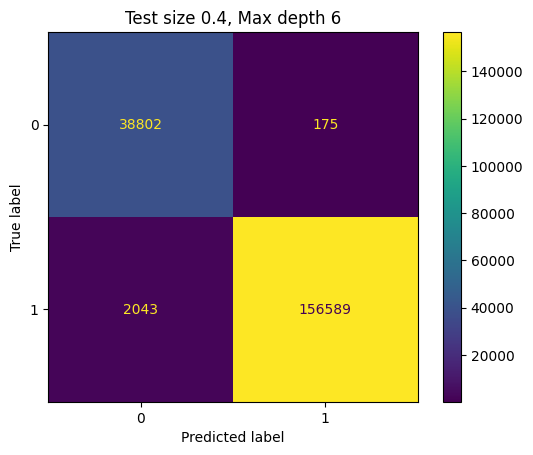

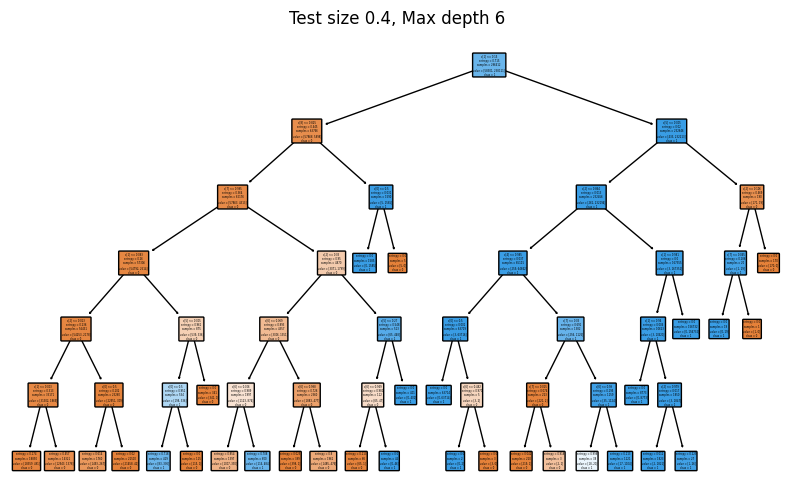

Test size 0.4, max depth 8: accuracy = 0.9902484198594194
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion matrix:
[[ 38703    274]
 [  1653 156979]]


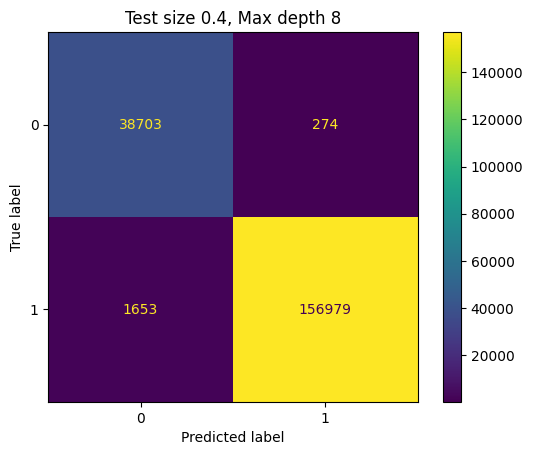

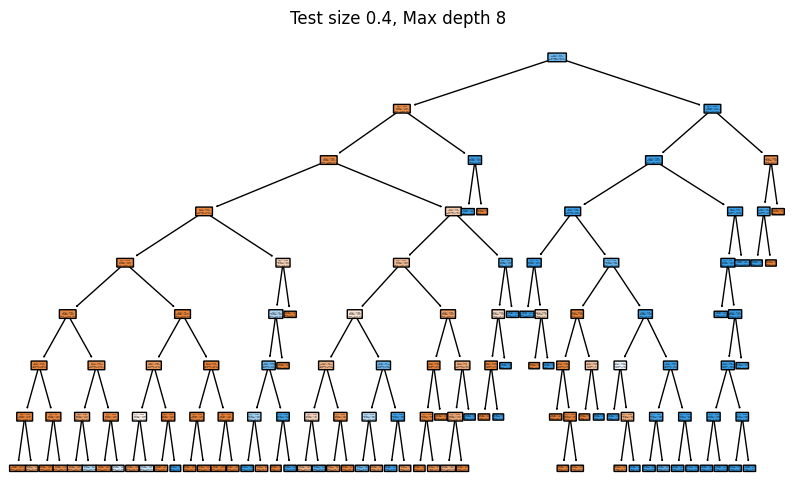

Best split for Test size 0.4 (Entropy): max depth = 8, accuracy = 0.9902484198594194

Test size 0.5, max depth 4: accuracy = 0.986073494702665
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48650
           1       1.00      0.98      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion matrix:
[[ 48387    263]
 [  3177 195184]]


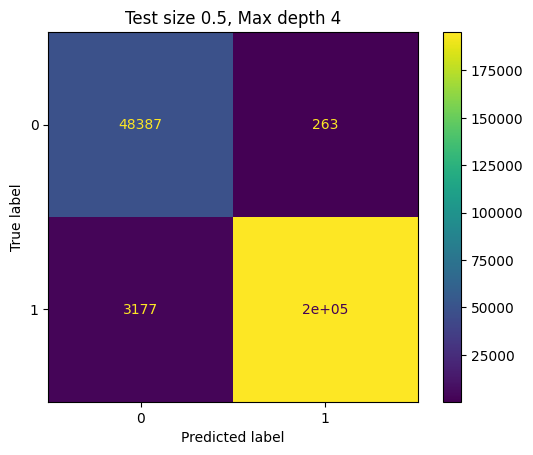

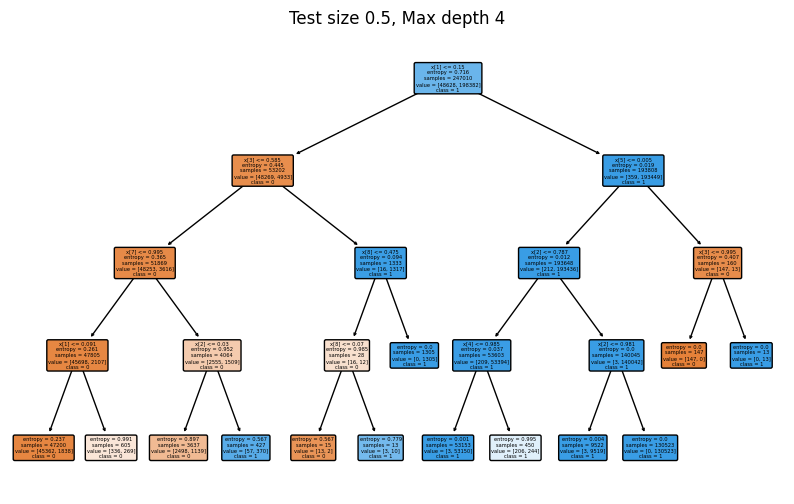

Test size 0.5, max depth 6: accuracy = 0.9889073765945646
Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion matrix:
[[ 48454    196]
 [  2544 195817]]


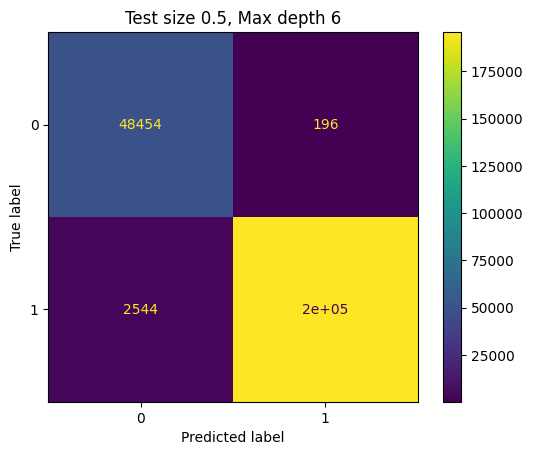

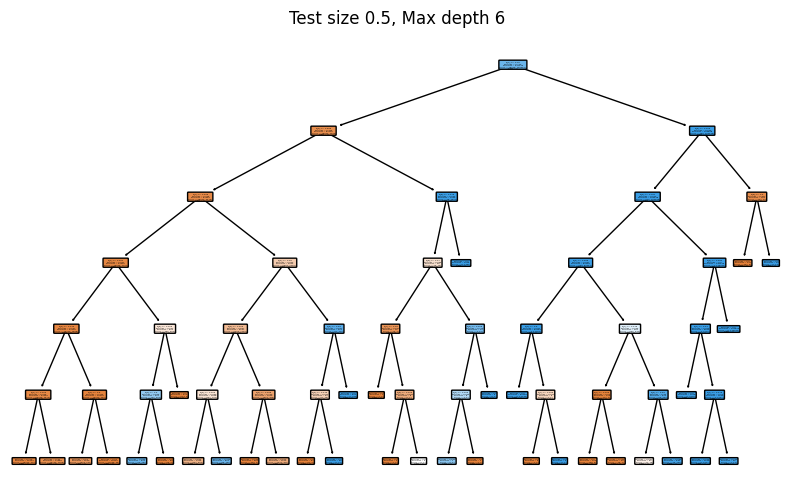

Test size 0.5, max depth 8: accuracy = 0.9904093339972714
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011

Confusion matrix:
[[ 48299    351]
 [  2018 196343]]


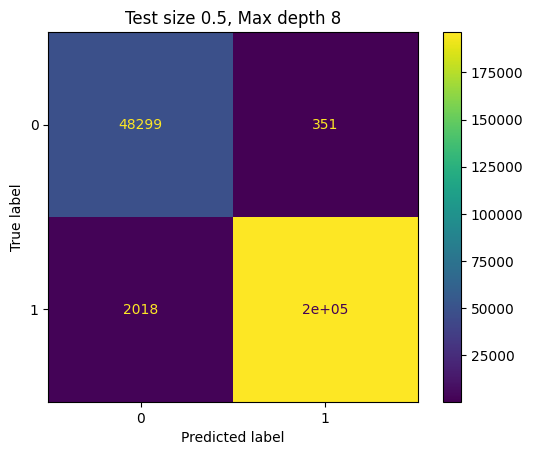

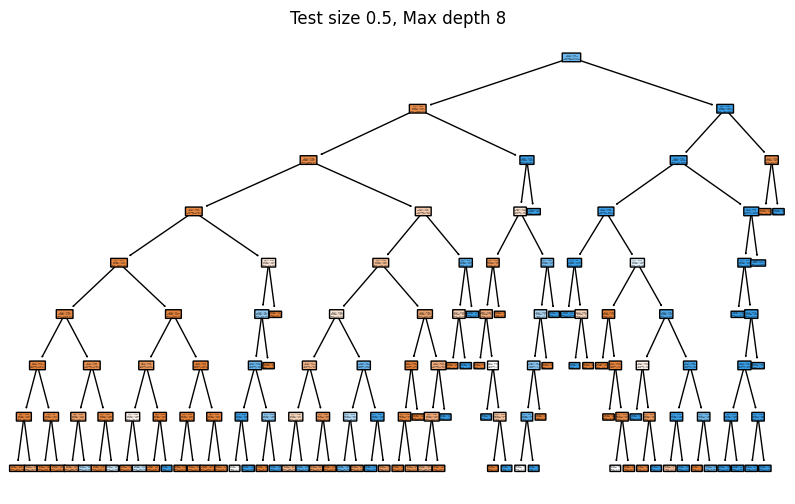

Best split for Test size 0.5 (Entropy): max depth = 8, accuracy = 0.9904093339972714



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Define the test sizes
test_sizes = [0.3, 0.4, 0.5]

# Loop over test sizes
for test_size in test_sizes:
    # Split the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Create a list of max depths to try
    max_depths = [4, 6, 8]

    # Loop over max depths
    best_accuracy = 0
    best_depth = 0
    for depth in max_depths:
        # Train a decision tree classifier with the current max depth
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
        clf.fit(X_train, Y_train)

        # Evaluate the performance on test data
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)

        # Report the classification performance
        print(f"Test size {test_size}, max depth {depth}: accuracy = {accuracy}")
        print("Classification report:")
        print(classification_report(Y_test, y_pred))
        print("Confusion matrix:")
        print(confusion_matrix(Y_test, y_pred))
         # Plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred), display_labels=['0', '1'])
        disp.plot()
        plt.title(f"Test size {test_size}, Max depth {depth}")
        plt.show()
        print()

        # Update the best accuracy and depth
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth

        # Visualize the decision tree
        plt.figure(figsize=(10, 6))
        plot_tree(clf, filled=True, rounded=True, class_names=['0', '1'])
        plt.title(f"Test size {test_size}, Max depth {depth}")

        plt.show()

    # Report the best split for the current test size
    print(f"Best split for Test size {test_size} (Entropy): max depth = {best_depth}, accuracy = {best_accuracy}")
    print()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
# Report for Subset 1
print("Subset 1:")
print("Number of training examples:", len(X_train_1))
print("Number of test examples:", len(X_test_1))
print("Training labels distribution:", np.unique(Y_train_1, return_counts=True))
print("Test labels distribution:", np.unique(Y_test_1, return_counts=True))
print()

# Train a DecisionTree with parameters of our choice
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=42)
clf.fit(X_train_1, Y_train_1)

# Evaluate the F1 score on train and test data
train_f1 = f1_score(Y_train_1, clf.predict(X_train_1))
test_f1 = f1_score(Y_test_1, clf.predict(X_test_1))
print("DecisionTree without mitigation strategies:")
print(f"F1 score on train data: {train_f1}")
print(f"F1 score on test data: {test_f1}")
print()

# Pre-pruning
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
clf.fit(X_train_1, Y_train_1)
train_f1 = f1_score(Y_train_1, clf.predict(X_train_1))
test_f1 = f1_score(Y_test_1, clf.predict(X_test_1))
print("DecisionTree with pre-pruning:")
print(f"F1 score on train data: {train_f1}")
print(f"F1 score on test data: {test_f1}")
print()

# Post-pruning
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
path = clf.cost_complexity_pruning_path(X_train_1, Y_train_1)
ccp_alphas = path.ccp_alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_1, Y_train_1)
    train_f1 = f1_score(Y_train_1, clf.predict(X_train_1))
    test_f1 = f1_score(Y_test_1, clf.predict(X_test_1))
    if test_f1 > 0.6: # Stop early if the test F1 score is good enough
        print("DecisionTree with post-pruning:")
        print(f"F1 score on train data: {train_f1}")
        print(f"F1 score on test data: {test_f1}")
        print()
        break

# K-fold cross-validation
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_f1_scores = cross_val_score(clf, X_train_1, Y_train_1, cv=5, scoring='f1_macro')
test_f1_scores = cross_val_score(clf, X_test_1, Y_test_1, cv=5, scoring='f1_macro')
print("DecisionTree with k-fold cross-validation:")
print(f"F1 score on train data: {train_f1_scores.mean():.3f} +/- {train_f1_scores.std():.3f}")
print(f"F1 score on test data: {test_f1_scores.mean():.3f} +/- {test_f1_scores.std():.3f}")
print()

Subset 1:
Number of training examples: 345814
Number of test examples: 148207
Training labels distribution: (array([0, 1]), array([ 68086, 277728]))
Test labels distribution: (array([0, 1]), array([ 29192, 119015]))

DecisionTree without mitigation strategies:
F1 score on train data: 0.9946391603460589
F1 score on test data: 0.9942862447884139

DecisionTree with pre-pruning:
F1 score on train data: 0.9919838988966755
F1 score on test data: 0.9918455607605168

DecisionTree with post-pruning:
F1 score on train data: 0.9955735177429821
F1 score on test data: 0.9940742552751781

DecisionTree with k-fold cross-validation:
F1 score on train data: 0.986 +/- 0.001
F1 score on test data: 0.984 +/- 0.001



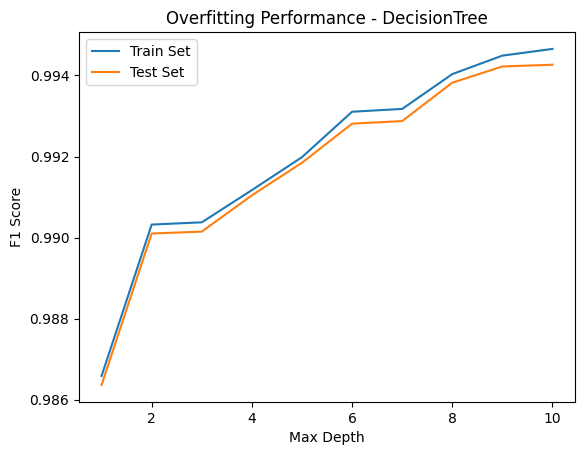

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store F1 scores
train_f1_scores = []
test_f1_scores = []
depths = []

# Vary the maximum depth of the decision tree
for depth in range(1, 11):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train_1, Y_train_1)
    train_f1 = f1_score(Y_train_1, clf.predict(X_train_1))
    test_f1 = f1_score(Y_test_1, clf.predict(X_test_1))

    depths.append(depth)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plot the F1 scores
plt.plot(depths, train_f1_scores, label='Train Set')
plt.plot(depths, test_f1_scores, label='Test Set')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('Overfitting Performance - DecisionTree')
plt.legend()
plt.show()


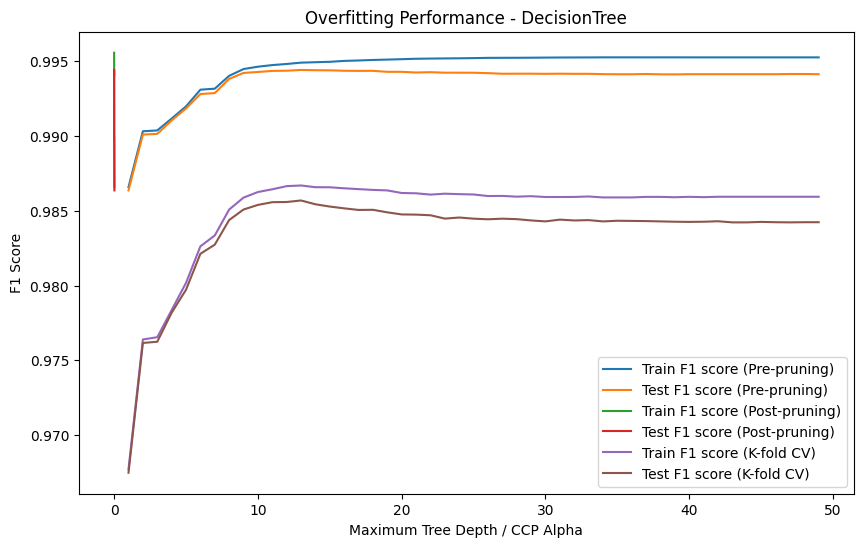

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score

# Subset 1: 70% train, 30% test
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train a DecisionTree with parameters of your choice (without mitigation strategies)
clf_no_mitigation = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=42)
clf_no_mitigation.fit(X_train_1, Y_train_1)

# Calculate F1 scores for train and test data (without mitigation strategies)
train_f1_scores_no_mitigation = []
test_f1_scores_no_mitigation = []
depths = range(1, 50)  # Vary the maximum tree depth

for depth in depths:
    clf_no_mitigation.max_depth = depth
    clf_no_mitigation.fit(X_train_1, Y_train_1)
    train_predictions = clf_no_mitigation.predict(X_train_1)
    train_f1 = f1_score(Y_train_1, train_predictions)
    train_f1_scores_no_mitigation.append(train_f1)
    test_predictions = clf_no_mitigation.predict(X_test_1)
    test_f1 = f1_score(Y_test_1, test_predictions)
    test_f1_scores_no_mitigation.append(test_f1)

# Pre-pruning
clf_pre_pruning = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
clf_pre_pruning.fit(X_train_1, Y_train_1)

# Calculate F1 scores for train and test data (pre-pruning)
train_f1_scores_pre_pruning = []
test_f1_scores_pre_pruning = []

for depth in depths:
    clf_pre_pruning.max_depth = depth
    clf_pre_pruning.fit(X_train_1, Y_train_1)
    train_predictions = clf_pre_pruning.predict(X_train_1)
    train_f1 = f1_score(Y_train_1, train_predictions)
    train_f1_scores_pre_pruning.append(train_f1)
    test_predictions = clf_pre_pruning.predict(X_test_1)
    test_f1 = f1_score(Y_test_1, test_predictions)
    test_f1_scores_pre_pruning.append(test_f1)

# Post-pruning
clf_post_pruning = DecisionTreeClassifier(criterion='entropy', random_state=42)
path = clf_post_pruning.cost_complexity_pruning_path(X_train_1, Y_train_1)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the last element
train_f1_scores_post_pruning = []
test_f1_scores_post_pruning = []

for ccp_alpha in ccp_alphas:
    clf_post_pruning.ccp_alpha = ccp_alpha
    clf_post_pruning.fit(X_train_1, Y_train_1)
    train_predictions = clf_post_pruning.predict(X_train_1)
    train_f1 = f1_score(Y_train_1, train_predictions)
    train_f1_scores_post_pruning.append(train_f1)
    test_predictions = clf_post_pruning.predict(X_test_1)
    test_f1 = f1_score(Y_test_1, test_predictions)
    test_f1_scores_post_pruning.append(test_f1)

# K-fold cross-validation
clf_kfold_cv = DecisionTreeClassifier(criterion='entropy', random_state=42)
train_f1_scores_kfold_cv = []
test_f1_scores_kfold_cv = []

for depth in depths:
    clf_kfold_cv.max_depth = depth
    train_f1_scores = cross_val_score(clf_kfold_cv, X_train_1, Y_train_1, cv=5, scoring='f1_macro')
    test_f1_scores = cross_val_score(clf_kfold_cv, X_test_1, Y_test_1, cv=5, scoring='f1_macro')
    train_f1_scores_kfold_cv.append(train_f1_scores.mean())
    test_f1_scores_kfold_cv.append(test_f1_scores.mean())

# Plotting
plt.figure(figsize=(10, 6))

# # Without mitigation strategies
# plt.plot(depths, train_f1_scores_no_mitigation, label='Train F1 score (No mitigation)')
# plt.plot(depths, test_f1_scores_no_mitigation, label='Test F1 score (No mitigation)')

# Pre-pruning
plt.plot(depths, train_f1_scores_pre_pruning, label='Train F1 score (Pre-pruning)')
plt.plot(depths, test_f1_scores_pre_pruning, label='Test F1 score (Pre-pruning)')

# Post-pruning
plt.plot(ccp_alphas, train_f1_scores_post_pruning, label='Train F1 score (Post-pruning)')
plt.plot(ccp_alphas, test_f1_scores_post_pruning, label='Test F1 score (Post-pruning)')

# K-fold cross-validation
plt.plot(depths, train_f1_scores_kfold_cv, label='Train F1 score (K-fold CV)')
plt.plot(depths, test_f1_scores_kfold_cv, label='Test F1 score (K-fold CV)')

plt.xlabel('Maximum Tree Depth / CCP Alpha')
plt.ylabel('F1 Score')
plt.title('Overfitting Performance - DecisionTree')
plt.legend()
plt.show()
